# Import the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics

# Upload the data sheet 

In [2]:
#loading the data from csv file to pandas dataframe
dataset = pd.read_csv("Car_Data.csv")

In [3]:
#inspecting the first 5 rows of the dataset
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Bmw,2015,80.2,90.2,12000,Petrol,Dealer,Manual,0
1,swift,2014,4.5,6.5,6500,Diesel,Dealer,Manual,0
2,Dzire,2008,5.6,7.4,5490,Diesel,Dealer,Manual,0
3,Eeco,2020,5.2,6.2,4580,Petrol,Dealer,Manual,0
4,Baleno,2006,6.5,8.0,2784,Petrol,Dealer,Manual,0


In [4]:
# Checking number of rows and columns
dataset.shape

(15, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       15 non-null     object 
 1   Year           15 non-null     int64  
 2   Selling_Price  15 non-null     float64
 3   Present_Price  15 non-null     float64
 4   Kms_Driven     15 non-null     int64  
 5   Fuel_Type      15 non-null     object 
 6   Seller_Type    15 non-null     object 
 7   Transmission   15 non-null     object 
 8   Owner          15 non-null     int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.2+ KB


In [6]:
# Checking the number of missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#Checking the distribution of categorial data
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    8
Diesel    7
Name: Fuel_Type, dtype: int64
Dealer    15
Name: Seller_Type, dtype: int64
Manual    15
Name: Transmission, dtype: int64


# Encoding the Categorial Data

In [8]:
#Encoding because our system/machine better understands the numerical value as compared to the alphabetical 
# Encoding "Fuel_Type" Column
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1}},inplace=True)

# Encoding "Seller_Type" Column
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding "Transmission" Column
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [9]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Bmw,2015,80.2,90.2,12000,0,0,0,0
1,swift,2014,4.5,6.5,6500,1,0,0,0
2,Dzire,2008,5.6,7.4,5490,1,0,0,0
3,Eeco,2020,5.2,6.2,4580,0,0,0,0
4,Baleno,2006,6.5,8.0,2784,0,0,0,0


# Splitting the data and Target

In [10]:
X = dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = dataset['Selling_Price']

In [11]:
print(X)

    Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0   2015           90.2       12000          0            0             0   
1   2014            6.5        6500          1            0             0   
2   2008            7.4        5490          1            0             0   
3   2020            6.2        4580          0            0             0   
4   2006            8.0        2784          0            0             0   
5   2004            5.6       80000          1            0             0   
6   2010           24.2        7549          1            0             0   
7   2007           14.2        4200          0            0             0   
8   2019           20.1        3598          0            0             0   
9   2012           10.2        5400          1            0             0   
10  2018            7.6        9000          1            0             0   
11  2007            8.4        8400          0            0             0   

In [12]:
print(Y)

0     80.2
1      4.5
2      5.6
3      5.2
4      6.5
5      3.5
6     20.2
7     12.3
8     18.2
9      8.2
10     6.8
11     7.2
12     8.2
13     6.1
14    14.6
Name: Selling_Price, dtype: float64


# Splitting Training and Test data

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.1, random_state=2)


# Linear Regression

In [14]:
#Loading the Linear Regression Model
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

# Prediction of Training Data

In [16]:
# Prediction of Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R Square Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("Root mean Square Error: ", error_score)

Root mean Square Error:  0.999134002711245


# Visualize the actual prices and Predicted prices

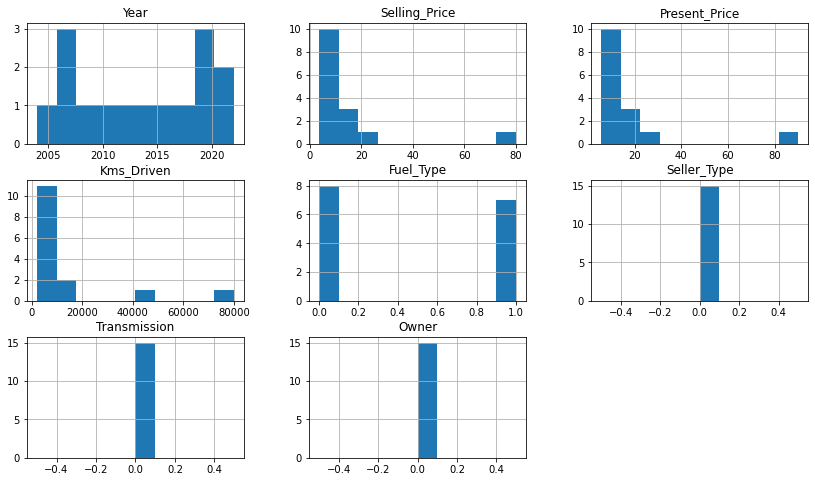

In [19]:
dataset.hist(figsize=(14, 8))

plt.show()

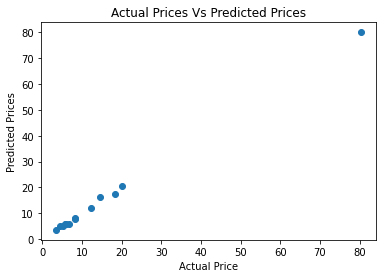

In [20]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

# Prediction of Testing Data

In [21]:
# Prediction of Testing Data
testing_data_prediction = lin_reg_model.predict(X_test)

In [22]:
# R Square Error
error_score = metrics.r2_score(Y_test,testing_data_prediction)
print("Root mean Square Error: ", error_score)

Root mean Square Error:  0.5011921671367034


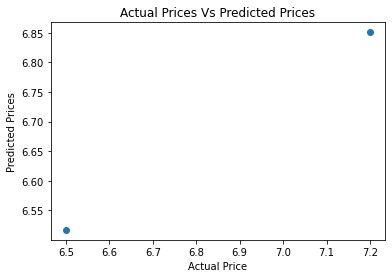

In [23]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()